✅ Loading the Excel file: ./Downloads/Apple Inc Financial Model.xlsx

📌 Available Sheets in the Excel File:
- Index
- Income Statement
- Balance Sheet
- Cash Flow
- Ratio Analysis
- Revenue Build Up
- Cost Sheet
- Working cap
- Depreciation Schedule
- Shareholders Equity
- Debt Schedule
- DCF Valuation


/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


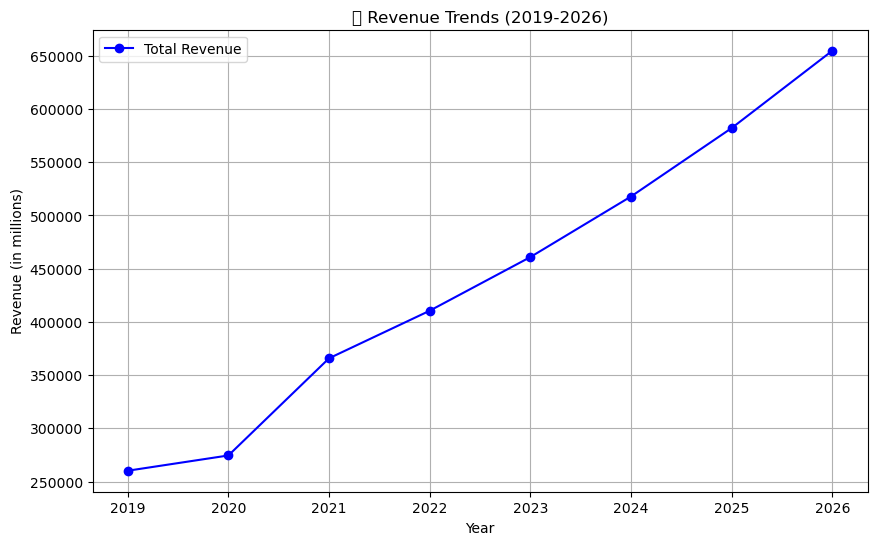

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128181 (\N{BANKNOTE WITH DOLLAR SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


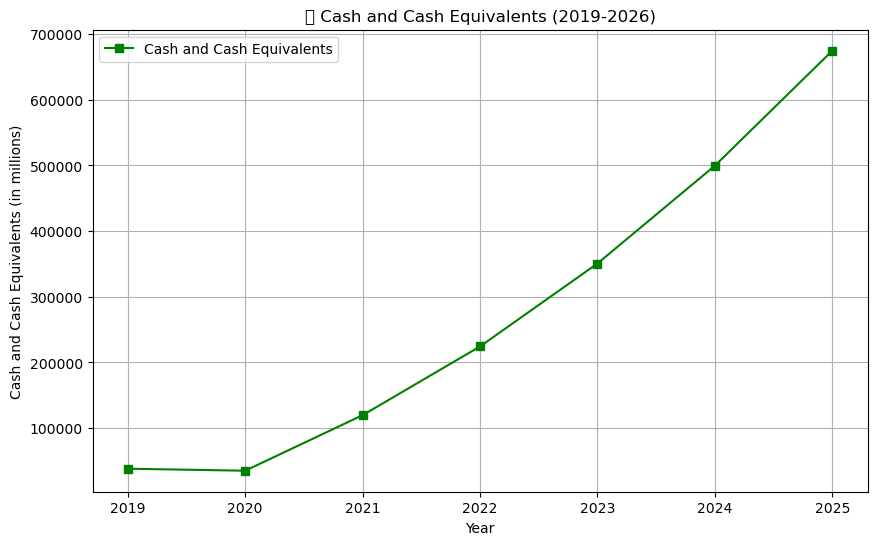

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


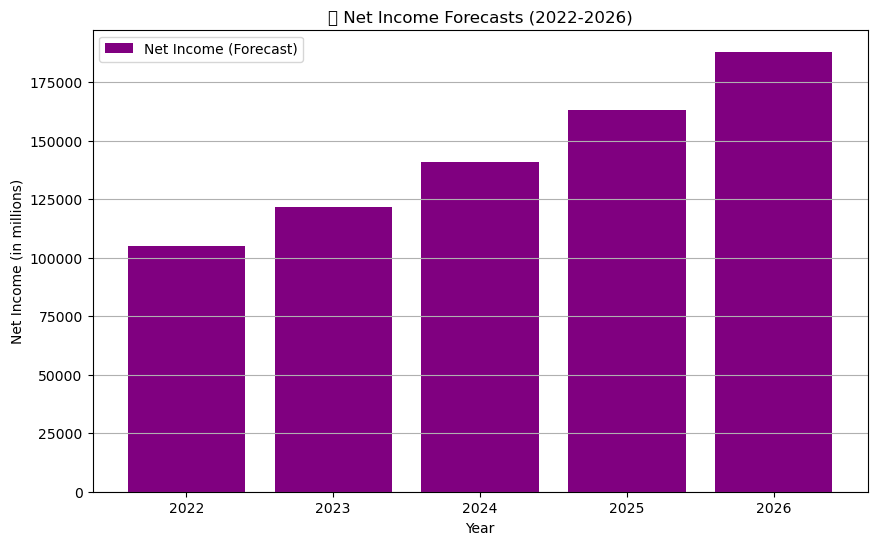

/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


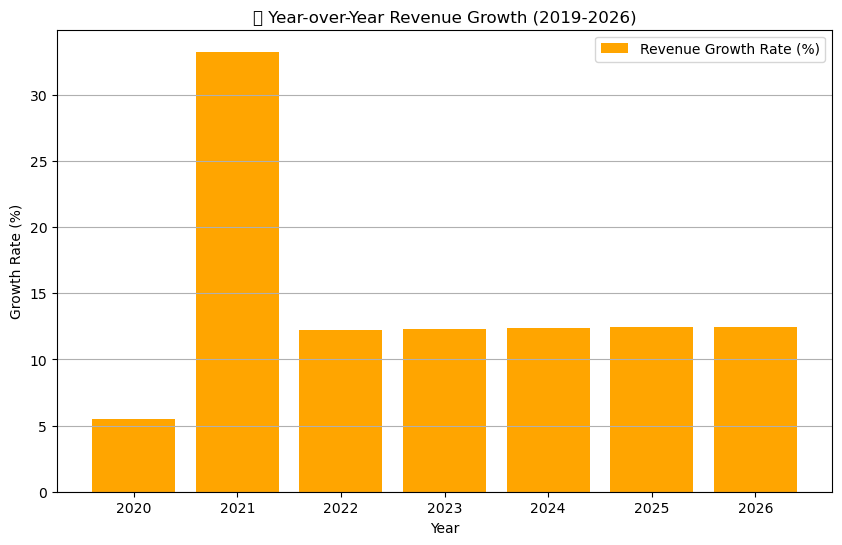

In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Define the file name
file_name = "Apple Inc Financial Model.xlsx"

# Check if the file exists in the current directory
if not os.path.exists(file_name):
    print(f"Error: The file '{file_name}' was not found in the current directory.")
    print("Please upload the Excel file to the working directory.")
else:
    print(f"✅ Loading the Excel file: {file_name}\n")

    # Load the Excel file
    xls = pd.ExcelFile(file_name)

    # Display available sheets
    print("📌 Available Sheets in the Excel File:")
    for sheet in xls.sheet_names:
        print(f"- {sheet}")

    # Function to clean a sheet
    def clean_sheet(sheet_name, skip_rows):
        try:
            # Load the sheet and skip unnecessary rows
            data = pd.read_excel(xls, sheet_name=sheet_name, skiprows=skip_rows)
            return data
        except Exception as e:
            return f"Error processing {sheet_name}: {e}"

    # Clean specific sheets
    cleaned_income_statement = clean_sheet("Income Statement", 1)
    cleaned_balance_sheet = clean_sheet("Balance Sheet", 2)
    cleaned_cash_flow = clean_sheet("Cash Flow", 2)

    # 1️⃣ Revenue Trends (Income Statement)
    plt.figure(figsize=(10, 6))
    try:
        # Extract relevant data
        years = ["2019", "2020", "2021", "2022", "2023", "2024", "2025", "2026"]
        revenue_data = cleaned_income_statement.iloc[3, 2:10].astype(float)  # "Total net sales" row

        # Plot
        plt.plot(years, revenue_data, marker='o', linestyle='-', color='b', label="Total Revenue")
        plt.title("📈 Revenue Trends (2019-2026)")
        plt.xlabel("Year")
        plt.ylabel("Revenue (in millions)")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error generating Revenue Trends graph: {e}")

    # 2️⃣ Cash and Cash Equivalents (Balance Sheet)
    plt.figure(figsize=(10, 6))
    try:
        # Extract relevant data, drop missing or misaligned entries
        cash_equivalents = cleaned_balance_sheet.iloc[1, 3:10].dropna().astype(float)  # "Cash and cash equivalents" row
        adjusted_years = years[:len(cash_equivalents)]  # Match years to available data

        # Plot
        plt.plot(adjusted_years, cash_equivalents, marker='s', linestyle='-', color='g', label="Cash and Cash Equivalents")
        plt.title("💵 Cash and Cash Equivalents (2019-2026)")
        plt.xlabel("Year")
        plt.ylabel("Cash and Cash Equivalents (in millions)")
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error generating Cash and Cash Equivalents graph: {e}")

    # 3️⃣ Net Income Forecasts (Cash Flow Statement)
    plt.figure(figsize=(10, 6))
    try:
        # Extract relevant data, drop missing or misaligned entries
        net_income_full_data = cleaned_cash_flow.iloc[0, 5:].dropna()  # Start from 2022 onward
        forecast_years = ["2022", "2023", "2024", "2025", "2026"]
        net_income_forecast_values = net_income_full_data.values.astype(float)  # Ensure proper data type

        # Plot bar chart
        plt.bar(forecast_years, net_income_forecast_values, color='purple', label="Net Income (Forecast)")
        plt.title("📊 Net Income Forecasts (2022-2026)")
        plt.xlabel("Year")
        plt.ylabel("Net Income (in millions)")
        plt.legend()
        plt.grid(axis='y')
        plt.show()
    except Exception as e:
        print(f"Error generating Net Income Forecasts graph: {e}")

# 1️⃣ Revenue Growth Rates
    try:
        revenue_data = cleaned_income_statement.iloc[3, 2:10].astype(float)  # "Total net sales" row
        revenue_growth = revenue_data.pct_change() * 100  # YoY growth in %
        
        # Plot
        plt.figure(figsize=(10, 6))
        plt.bar(years[1:], revenue_growth[1:], color='orange', label="Revenue Growth Rate (%)")
        plt.title("📈 Year-over-Year Revenue Growth (2019-2026)")
        plt.xlabel("Year")
        plt.ylabel("Growth Rate (%)")
        plt.legend()
        plt.grid(axis='y')
        plt.show()
    except Exception as e:
        print(f"Error calculating Revenue Growth Rates: {e}")


